# *고객 데이터 분석 연습(케글 데이터 이용)*

## 서문(고객의 데이터를 이용해 시각화)
#### ★ 소비자 지출에 관련된 정보를 파악 ex) 가장 선호하는 제품, 연령대 등  
#### ★ 고객 관리 및 충성도 확인

## 데이터 정보
1. 2014년의 데이터 정보입니다.    
2. 데이터 출처 링크 https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign
## 정보 설명  
---
- Year_Birth - 고객의 나이 - 'Age'
- Marital_Status - 고객의 결혼 상태 - 'Marriage'  
- Income - 고객의 연간 가구 소득 
- Dt_Customer - 고객이 회사에 등록한 날짜 - 'First' 
- Recency - 마지막 구매 이후 일수 - 'period'
- MntWines - 지난 2년 동안 와인 제품에 지출한 금액 - 'Wines'  
- MntFruits - 금액 지난 2년 동안 과일 제품에 지출한 금액 - 'Fruits'  
- MntMeatProducts - 지난 2년 동안 육류 제품에 지출한 금액 - 'Meat'  
- MntFishProducts - 지난 2년 동안 생선 제품에 지출한 금액 - 'Fish' 
- MntSweetProducts - 지난 2년 동안 단 제품에 지출한 금액 - 'Sweet'  
- MntGoldProds - 지난 2년 동안 금 제품에 지출한 금액 - 'Gold'  
- NumDealsPurchases - 할인된 상품 구매 횟수 - 'Discount'   
- NumWebPurchases - 회사 웹사이트를 통해 구매한 횟수 - 'Web'        
- NumStorePurchases - 매장에서 직접 구매한 횟수 - 'Store'   
- NumWebVisitsMonth - 지난 달에 회사 웹사이트를 방문한 횟수 - 'WebMonth'  
- Complain - 고객의 불만 이력 (1 : 존재, 0 : 없음)  
- ★추가변수★ Spending - 총 지출 금액 
---

In [28]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
customer = pd.read_excel('customer_campaign.xlsx')
pd.set_option('display.max_columns', None)

In [29]:
customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## 분석에 사용할 데이터 추출
- 소비자 지출에 관련된 정보 파악

In [30]:
cus = customer[['ID', 'Year_Birth', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']]
cus

,ID,Year_Birth,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,5524,1957,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,4,7,0
1,2174,1954,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,2,5,0
2,4141,1965,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,10,4,0
3,6182,1984,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,4,6,0
4,5324,1981,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,4,5,0
2236,4001,1946,Together,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,5,7,0
2237,7270,1981,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,13,6,0
2238,8235,1956,Together,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,10,3,0


In [31]:
# 분석에 앞서 변수의 이름 바꾸기
cus = cus.rename(columns = {'Year_Birth' : 'Age', 'Marital_Status' : 'Marriage', 'Dt_Customer' : 'First', 'Recency' : 'period', 'MntWines' : 'Wines', 'MntFruits' : 'Fruits', 'MntMeatProducts' : 'Meat', 
                                      'MntFishProducts' : 'Fish',  'MntSweetProducts' : 'Sweet', 'MntGoldProds' : 'Gold', 'NumDealsPurchases' : 'Discount', 
                                      'NumWebPurchases' : 'Web', 'NumStorePurchases' : 'Store', 'NumWebVisitsMonth' : 'WebMonth'})
cus

,ID,Age,Marriage,Income,First,period,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount,Web,Store,WebMonth,Complain
0,5524,1957,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,4,7,0
1,2174,1954,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,2,5,0
2,4141,1965,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,10,4,0
3,6182,1984,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,4,6,0
4,5324,1981,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,4,5,0
2236,4001,1946,Together,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,5,7,0
2237,7270,1981,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,13,6,0
2238,8235,1956,Together,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,10,3,0


In [32]:
# 나이 변수를 연도에서 숫자 나이로 바꾸기
cus['Age'] = 2014 - cus['Age']
# 총 지출액 변수 추가하기
cus = cus.assign(Spending = lambda x : x['Wines'] + x['Fruits'] + x['Meat'] + x['Fish'] + x['Sweet'] + x['Gold'])
cus

,ID,Age,Marriage,Income,First,period,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount,Web,Store,WebMonth,Complain,Spending
0,5524,57,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,4,7,0,1617
1,2174,60,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,2,5,0,27
2,4141,49,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,10,4,0,776
3,6182,30,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,4,6,0,53
4,5324,33,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,6,5,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Married,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,4,5,0,1341
2236,4001,68,Together,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,5,7,0,444
2237,7270,33,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,13,6,0,1241
2238,8235,58,Together,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,10,3,0,843


In [33]:
# 전체 데이터 통계
cus.describe().round()

,ID,Age,Income,period,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount,Web,Store,WebMonth,Complain,Spending
count,2240.0,2240.0,2216.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0
mean,5592.0,45.0,52247.0,49.0,304.0,26.0,167.0,38.0,27.0,44.0,2.0,4.0,6.0,5.0,0.0,606.0
std,3247.0,12.0,25173.0,29.0,337.0,40.0,226.0,55.0,41.0,52.0,2.0,3.0,3.0,2.0,0.0,602.0
min,0.0,18.0,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
25%,2828.0,37.0,35303.0,24.0,24.0,1.0,16.0,3.0,1.0,9.0,1.0,2.0,3.0,3.0,0.0,69.0
50%,5458.0,44.0,51382.0,49.0,174.0,8.0,67.0,12.0,8.0,24.0,2.0,4.0,5.0,6.0,0.0,396.0
75%,8428.0,55.0,68522.0,74.0,504.0,33.0,232.0,50.0,33.0,56.0,3.0,6.0,8.0,7.0,0.0,1046.0
max,11191.0,121.0,666666.0,99.0,1493.0,199.0,1725.0,259.0,263.0,362.0,15.0,27.0,13.0,20.0,1.0,2525.0


- 제품별 평균 지출액 <와인:304, 과일:26, 육류:167, 생선:38, 단 제품:27, 금:44>로 와인의 비중이 압도적으로 높다.
- 하위 25퍼센트 지출액의 비중 또한 <와인:24, 과일:1, 육류:16, 생선:3, 단 제품:1, 금:9>로 와인의 비중이 압도적으로 높다.

## ★ 소비자의 지출 분석(시각화)

### 1) 연령대와 지출의 관계
- 연령대별 총 지출액

In [34]:
cus_A = cus.copy()
cus_A['연령대'] = ''
cus_A['연령대'][(cus_A['Age'] < 20)]  = '19세 이하'
cus_A['연령대'][(cus_A['Age'] < 30) & (cus_A['Age'] >= 20)] = '20대'
cus_A['연령대'][(cus_A['Age'] < 40) & (cus_A['Age'] >= 30)] = '30대'
cus_A['연령대'][(cus_A['Age'] < 50) & (cus_A['Age'] >= 40)] = '40대'
cus_A['연령대'][(cus_A['Age'] < 60) & (cus_A['Age'] >= 50)] = '50대'
cus_A['연령대'][(cus_A['Age'] >= 60)] = '60대 이상'
cus_A

,ID,Age,Marriage,Income,First,period,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount,Web,Store,WebMonth,Complain,Spending,연령대
0,5524,57,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,4,7,0,1617,50대
1,2174,60,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,2,5,0,27,60대 이상
2,4141,49,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,10,4,0,776,40대
3,6182,30,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,4,6,0,53,30대
4,5324,33,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,6,5,0,422,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Married,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,4,5,0,1341,40대
2236,4001,68,Together,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,5,7,0,444,60대 이상
2237,7270,33,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,13,6,0,1241,30대
2238,8235,58,Together,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,10,3,0,843,50대


In [35]:
cus_Ages = cus_A.groupby('연령대', as_index = False).agg(지출액 = ('Spending', 'sum'))
cus_Ages

,연령대,지출액
0,19세 이하,3944
1,20대,130678
2,30대,289416
3,40대,374758
4,50대,319465
5,60대 이상,238727


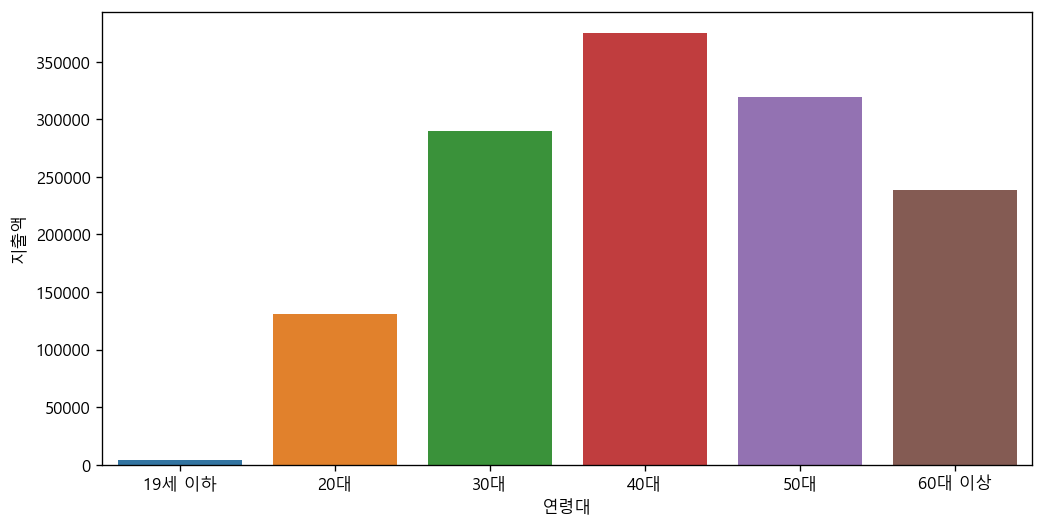

In [53]:
# 연령대별 총 지출액 비중 Age - Spending  
sns.barplot(data = cus_Ages, x = '연령대', y = '지출액')
plt.rcParams.update({'figure.dpi' : '120', 'figure.figsize' : [10, 8]})
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

- 총 지출액이 20 ~ 40대 까지는 증가의 추세를 보이고 이후 60대까지 감소의 추세
- 40대가 연령대 중 가장 많은 지출을 한다.

### 2. 결혼과 지출의 관계

In [37]:
# 혼인과 싱글 두 변수로 나누기 ('Married' : '결혼', 'Together' : '동거', 'Single' : '미혼', 'Divorced' : '이혼', 'Widow' : '여성')
# Together(결혼, 동거) or Single(미혼, 이혼, 여성)
cus_M = cus.replace({'Marriage' : {'Married' : 'Together', 'Divorced' : 'Single', 'Widow' : 'Single', 'Alone' : 'Single', 'Absurd' : 'Single', 'YOLO' : 'Single'}})
cus_M = cus_M.rename(columns = {'Marriage' : '혼인여부'})

혼인여부      지출액   
Single    493670    1
Together  863318    1
dtype: int64

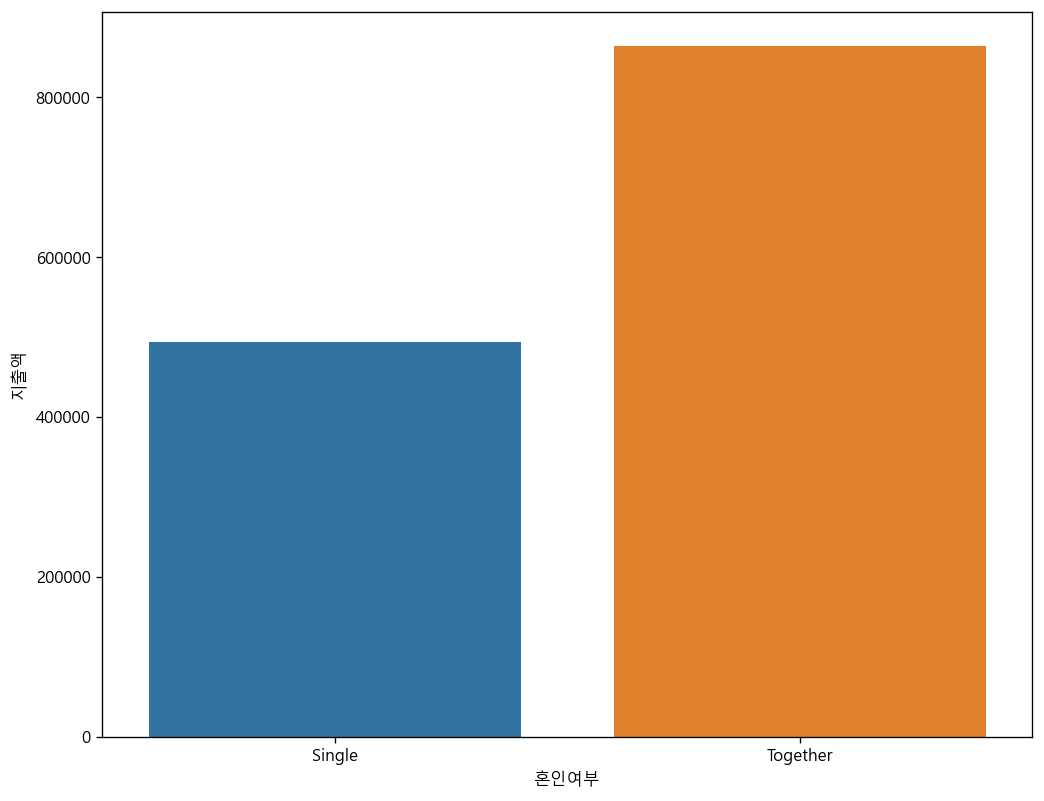

In [54]:
cus_Marriage = cus_M.groupby('혼인여부', as_index = False).agg(지출액 = ('Spending', 'sum'))
sns.barplot(data = cus_Marriage, x = '혼인여부', y = '지출액')
cus_Marriage.value_counts()

- 결혼을 한 사람일수록 제품에 대한 지출을 많이 한다.

## 3. 소득과 지출의 관계

In [39]:
# 전체 데이터 통계
cus.describe().round()

,ID,Age,Income,period,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount,Web,Store,WebMonth,Complain,Spending
count,2240.0,2240.0,2216.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0
mean,5592.0,45.0,52247.0,49.0,304.0,26.0,167.0,38.0,27.0,44.0,2.0,4.0,6.0,5.0,0.0,606.0
std,3247.0,12.0,25173.0,29.0,337.0,40.0,226.0,55.0,41.0,52.0,2.0,3.0,3.0,2.0,0.0,602.0
min,0.0,18.0,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
25%,2828.0,37.0,35303.0,24.0,24.0,1.0,16.0,3.0,1.0,9.0,1.0,2.0,3.0,3.0,0.0,69.0
50%,5458.0,44.0,51382.0,49.0,174.0,8.0,67.0,12.0,8.0,24.0,2.0,4.0,5.0,6.0,0.0,396.0
75%,8428.0,55.0,68522.0,74.0,504.0,33.0,232.0,50.0,33.0,56.0,3.0,6.0,8.0,7.0,0.0,1046.0
max,11191.0,121.0,666666.0,99.0,1493.0,199.0,1725.0,259.0,263.0,362.0,15.0,27.0,13.0,20.0,1.0,2525.0


- 하위 25% : 35303, 하위 50% : 51382, 하위 75% 68522
1. 하위소득 = 35303 이하의 소득
2. 중위소득 = 35303 이상 68522 이하의 소득
3. 상위소득 = 68522 이상의 소득

In [40]:
cus_I = cus.copy()
cus_I = cus_I.assign(소득_분류 = np.where(cus_I['Income'] < 35303, '저소득',
                           np.where((cus_I['Income'] >= 35303) & (cus_I['Income'] < 68522), '중위소득', '고소득')))
cus_I

,ID,Age,Marriage,Income,First,period,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount,Web,Store,WebMonth,Complain,Spending,소득_분류
0,5524,57,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,4,7,0,1617,중위소득
1,2174,60,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,2,5,0,27,중위소득
2,4141,49,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,10,4,0,776,고소득
3,6182,30,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,4,6,0,53,저소득
4,5324,33,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,6,5,0,422,중위소득
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Married,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,4,5,0,1341,중위소득
2236,4001,68,Together,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,5,7,0,444,중위소득
2237,7270,33,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,13,6,0,1241,중위소득
2238,8235,58,Together,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,10,3,0,843,고소득


소득_분류,지출액
고소득,763848
저소득,45202
중위소득,547938


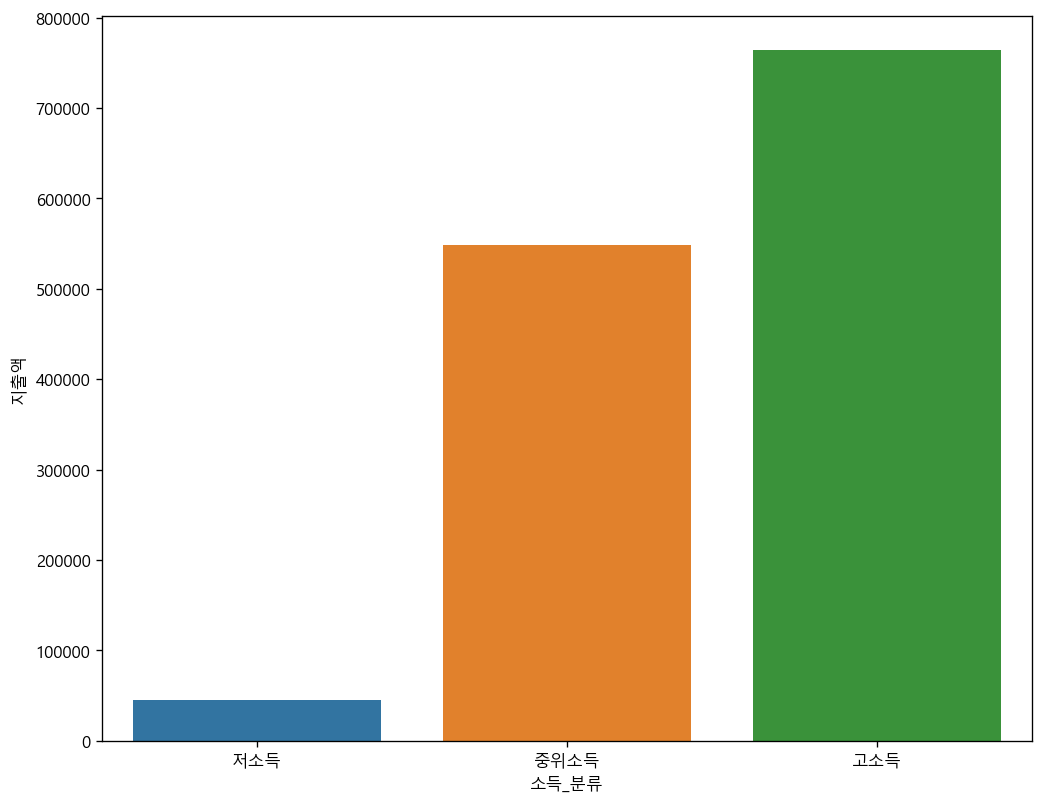

In [55]:
cus_Income = cus_I.groupby('소득_분류', as_index = False).agg(지출액 = ('Spending', 'sum'))
sns.barplot(data = cus_Income, x = '소득_분류', y = '지출액', order = ['저소득', '중위소득', '고소득'])
cus_Income.style.hide_index()

- 소득별 제품 지출액이 고소득으로 갈 수록 크게 높아지고 있다.

## 4. 할인과 지출의 관계

<AxesSubplot:xlabel='할인 횟수', ylabel='지출액'>

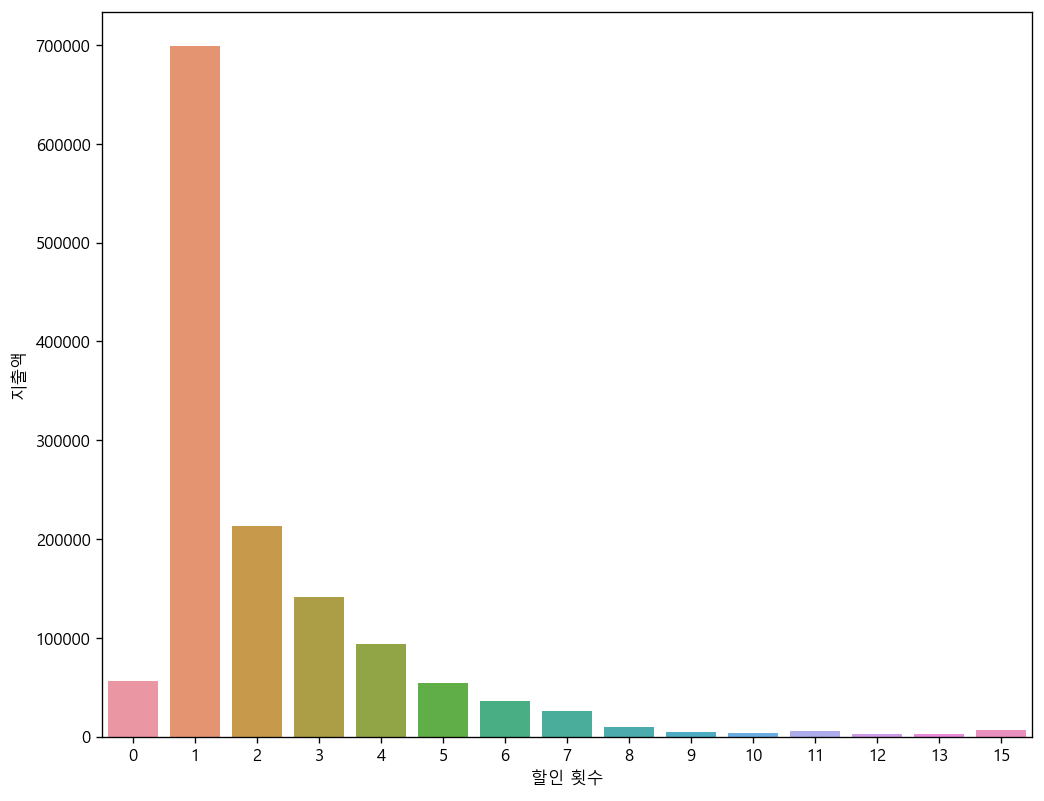

In [56]:
cus_D = cus.copy()
cus_D = cus_D.rename(columns = {'Discount' : '할인 횟수'})
cus_Discount = cus_D.groupby('할인 횟수', as_index = False).agg(지출액 = ('Spending', 'sum'))
sns.barplot(data = cus_Discount, x = '할인 횟수', y = '지출액')

- 할인 횟수가 적어질수록 소비하는 지출액 또한 급격히 낮아지고 있다.
- 1~2회의 낮은 할인 횟수 지출액이 가장 높고 할인 횟수가 증가할 때마다 지출하는 금액이 크게 줄어들고 있다.

## 소비자의 데이터 분석을 통해
- 가장 높은 지출을 보인 연령대는 40대
- 결혼을 한 사람의 지출이 혼자 사는 사람의 지출 보다 369,648이나 앞서며 큰 차이를 보였다. 
- 소득 대비 고소득일수록 지출액이 크게 높아지고 있다.
- 할인 횟수가 늘어나면 총 지출액이 줄어드는 현상을 발견

## * 지출과 관련있는 추가 특징에는 무엇이 있을까?

### 총 지출액(Spending)과 가장 높은 상관관계를 가진 변수

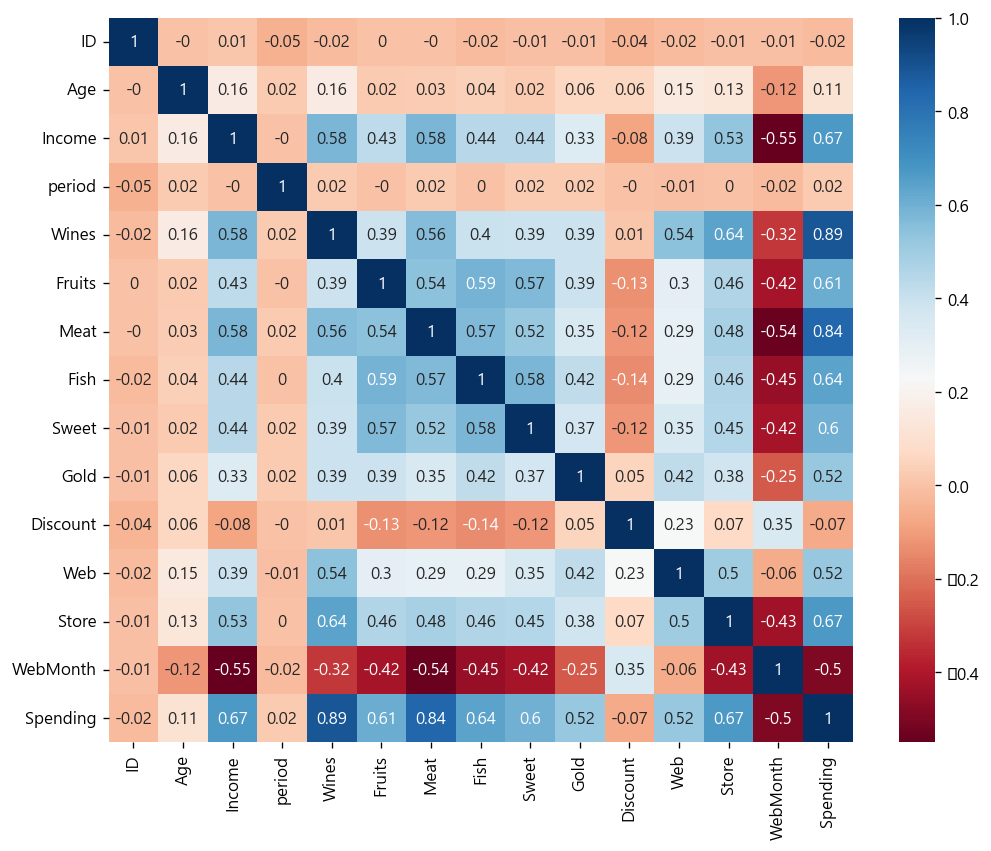

In [57]:
상관관계= cus.corr().round(2)
sns.heatmap(상관관계, annot = True, cmap = 'RdBu')
plt.rcParams.update({'figure.figsize' : [25, 15]})
plt.rcParams.update({'font.size' : '10'}) 

- 앞서 분석한 내용 중 소득(Income)이 지출액과 가장 큰 양의 상관관계를 형성하고 있다. > 고소득자일수록 높은 지출
- 상품들 중 와인과 육류가 각각 0.89, 0.84로 지출액에서 가장 큰 비중을 갖고 있다.
- 웹페이지 구매와 상점 구매 또한 둘 다 양의 상관관계를 갖고 있지만 상점 구매 쪽으로 갔을 때 더 큰 상관관계가 형성된 걸 보아 상점에서 소비자가 더 높은 지출을 하고 있음을 알 수 있다.

▷ 대상 : 40대 혼인한 고소득자  
▷ 제품 : 와인과 육류 제품  
▷ 할인 : 무분별한 할인보단 고객의 지출액이 높은 제품에 한 해 1~2회 방문 구매 할인 행사를 진행

# ★ 소비자 관리, 충성도
1. 불만을 가진 고객의 비율
2. 이탈한 고객의 비율

## 1) 불만을 가진 고객

In [44]:
cus = cus.replace({'Complain' : {0 : '없음', 1 : '불만'}})
cus

,ID,Age,Marriage,Income,First,period,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount,Web,Store,WebMonth,Complain,Spending
0,5524,57,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,4,7,없음,1617
1,2174,60,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,2,5,없음,27
2,4141,49,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,10,4,없음,776
3,6182,30,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,4,6,없음,53
4,5324,33,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,6,5,없음,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Married,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,4,5,없음,1341
2236,4001,68,Together,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,5,7,없음,444
2237,7270,33,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,13,6,없음,1241
2238,8235,58,Together,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,10,3,없음,843


In [45]:
cus_Complain = cus.query('Complain == "불만"')
cus_Complain

,ID,Age,Marriage,Income,First,period,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount,Web,Store,WebMonth,Complain,Spending
78,10401,38,Together,26326.0,2013-09-04,12,1,0,5,0,3,9,1,0,3,3,불만,18
147,3120,33,Together,38547.0,2013-08-28,49,6,1,10,0,1,4,1,1,2,8,불만,22
192,7829,114,Divorced,36640.0,2013-09-26,99,15,6,8,7,4,25,1,2,2,5,불만,65
271,5726,31,Single,31788.0,2014-03-20,15,16,7,23,0,8,6,3,3,4,5,불만,60
355,6201,36,Single,38643.0,2013-11-29,45,22,2,14,0,1,10,2,2,3,7,불만,49
358,6142,71,Married,65073.0,2013-08-20,65,629,17,177,69,0,8,1,5,5,2,불만,900
590,3710,30,Single,39684.0,2012-10-12,41,19,0,35,6,4,17,2,2,2,7,불만,81
972,10995,26,Married,15716.0,2012-11-12,8,16,5,30,8,7,26,3,3,4,8,불만,92
1041,6730,60,Married,38998.0,2012-11-03,92,34,1,14,0,0,5,3,2,3,8,불만,54
1069,2875,36,Married,67023.0,2014-03-04,93,444,44,382,11,8,17,1,3,13,2,불만,906


- 불만을 제기한 소비자(21명)

## 2) 이탈한 소비자 비율
이탈한 소비자 = 마지막 구매 이후 6개월 이상 구매가 없는 소비자

In [46]:
cus_P6 = cus.assign(C_period = np.where(cus['period'] >= 180, '이탈자', '소비자'))
cus_P6

,ID,Age,Marriage,Income,First,period,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount,Web,Store,WebMonth,Complain,Spending,C_period
0,5524,57,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,4,7,없음,1617,소비자
1,2174,60,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,2,5,없음,27,소비자
2,4141,49,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,10,4,없음,776,소비자
3,6182,30,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,4,6,없음,53,소비자
4,5324,33,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,6,5,없음,422,소비자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Married,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,4,5,없음,1341,소비자
2236,4001,68,Together,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,5,7,없음,444,소비자
2237,7270,33,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,13,6,없음,1241,소비자
2238,8235,58,Together,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,10,3,없음,843,소비자


In [47]:
cus_P6['C_period'].value_counts()
# 6개월 기준 0명의 이탈자

소비자    2240
Name: C_period, dtype: int64

### * 이탈한 소비자 재설정 = 마지막 구매 이후 3개월 이상 구매가 없는 소비자

In [48]:
# 3개월 이상 구매가 없는 소비자
cus_P3 = cus.assign(C_period = np.where(cus['period'] >= 90, '이탈자', '소비자'))
cus_P3

,ID,Age,Marriage,Income,First,period,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount,Web,Store,WebMonth,Complain,Spending,C_period
0,5524,57,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,4,7,없음,1617,소비자
1,2174,60,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,2,5,없음,27,소비자
2,4141,49,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,10,4,없음,776,소비자
3,6182,30,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,4,6,없음,53,소비자
4,5324,33,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,6,5,없음,422,이탈자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Married,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,4,5,없음,1341,소비자
2236,4001,68,Together,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,5,7,없음,444,소비자
2237,7270,33,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,13,6,없음,1241,이탈자
2238,8235,58,Together,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,10,3,없음,843,소비자


소비자    2022
이탈자     218
Name: C_period, dtype: int64

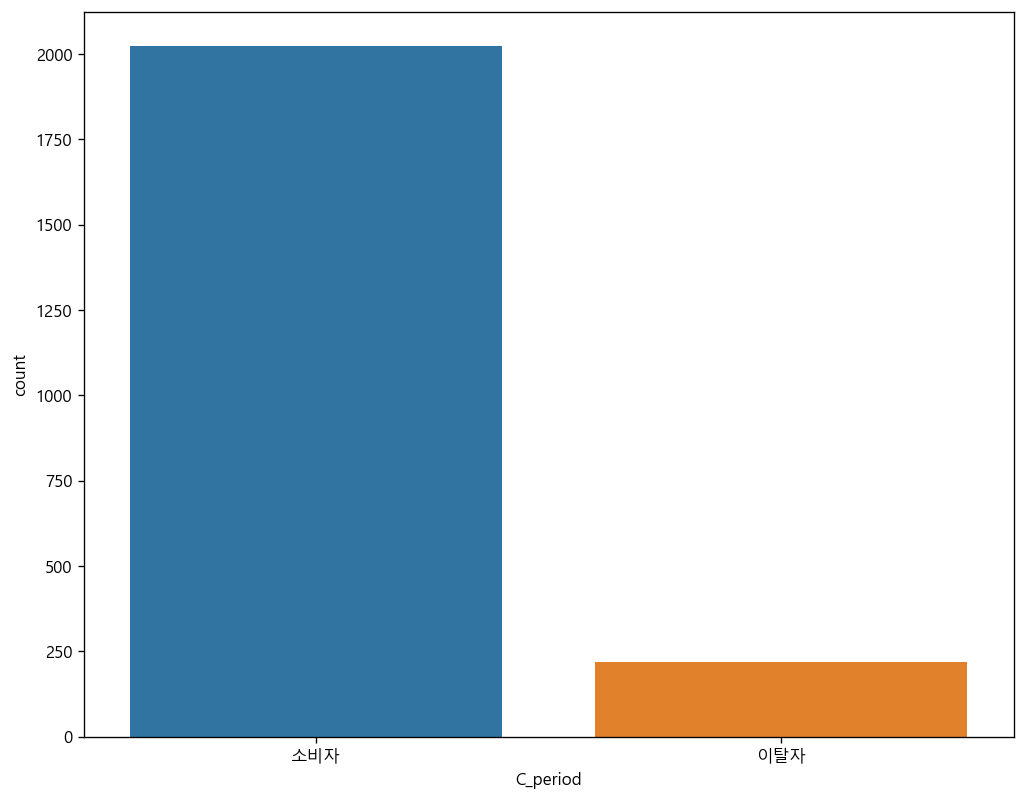

In [60]:
sns.countplot(data = cus_P3, x = 'C_period')
plt.rcParams.update({'figure.dpi' : '120', 'figure.figsize' : [10, 5]})
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
cus_P3['C_period'].value_counts()

## 소비자 관리
- 2240명의 전체 소비자 중 21명의 소비자만이 불만을 제기하였다. 불만을 가진 소비자는 대략 0.94%로 전체 소비자의 1% 채 되지 않는다.
- 이탈자의 기준을 6개월 이상으로 잡았을 시 단 한 명의 이탈자도 발생하지 않았다.
- 기준을 크게 낮춰 이탈자의 기준을 3개월 이상으로 줄였을 시 218명의 이탈자가 발생했다.  

▷ 고객의 불만은 21명으로 전체 고객 대비 1%도 되지 않았고 6개월 이상의 이탈 고객은 한 명도 발생하지 않았다.  
이탈자의 기준을 3개월로 크게 낮춘 결과 2240명의 약 9.7%에 해당하는 218명의 이탈자가 발생하였고, 이는 이탈자의 기준을 대폭 낮춘 결과이므로 큰 문제로 해석하기 모호하다.